## Artificial Neural Networks

### Import Required Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

### Load the Dataset

In [5]:
data=pd.read_csv('C:\\Users\\bilad\\ExcelR\\Assignments\\Datasets\\sonardataset.csv')
data.head()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,...,x_52,x_53,x_54,x_55,x_56,x_57,x_58,x_59,x_60,Y
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


### EDA

In [7]:
print('Dataset Info:', data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x_1     208 non-null    float64
 1   x_2     208 non-null    float64
 2   x_3     208 non-null    float64
 3   x_4     208 non-null    float64
 4   x_5     208 non-null    float64
 5   x_6     208 non-null    float64
 6   x_7     208 non-null    float64
 7   x_8     208 non-null    float64
 8   x_9     208 non-null    float64
 9   x_10    208 non-null    float64
 10  x_11    208 non-null    float64
 11  x_12    208 non-null    float64
 12  x_13    208 non-null    float64
 13  x_14    208 non-null    float64
 14  x_15    208 non-null    float64
 15  x_16    208 non-null    float64
 16  x_17    208 non-null    float64
 17  x_18    208 non-null    float64
 18  x_19    208 non-null    float64
 19  x_20    208 non-null    float64
 20  x_21    208 non-null    float64
 21  x_22    208 non-null    float64
 22  x_

In [8]:
print('Class Distribution:')
print(data['Y'].value_counts())

Class Distribution:
Y
M    111
R     97
Name: count, dtype: int64


In [9]:
# Check for missing values
data.isnull().sum()

x_1     0
x_2     0
x_3     0
x_4     0
x_5     0
       ..
x_57    0
x_58    0
x_59    0
x_60    0
Y       0
Length: 61, dtype: int64

### Data Preprocessing

In [11]:
#split inot features and target
x=data.iloc[:, :-1] #Features
y= data.iloc[:, -1] #Target

In [12]:
#Encode Target labels
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_encode=le.fit_transform(y) #M=1, R=0

In [13]:
# split data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train , y_test = train_test_split(x, y_encode,test_size=0.2, random_state=42, stratify=y_encode)

In [14]:
#Feature Normalization
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

### Model Building

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier
from tensorflow import keras


#Build basic ANN Model
def build_model():
    model=Sequential([
        Dense(32, input_dim=60, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model
        
   

In [17]:
# Train Model
baseline_model=build_model()
history=baseline_model.fit(x_train, y_train, epochs=50, batch_size=8, verbose=0, validation_split=0.1)

#### Hyperparameter Tuning


In [18]:
def build_tuned_model(hidden_layers=1, neurons=32, learning_rate=0.001):
    model=Sequential()
    model.add(Dense(neurons, input_dim=60, activation='relu'))

    for _ in range(hidden_layers -1):
        model.add(Dense(neurons//2, activation='relu'))
        model.add(Dropout(0.2)) # regularization to prevent overfitting

    model.add(Dense(1, activation='sigmoid'))
    optimizer=Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model
    

In [19]:
# Wrap model for GridSearch
from scikeras.wrappers import KerasClassifier
model_wrapper=KerasClassifier(model=build_tuned_model, verbose=0)



In [20]:
#Define Hyperparamet Grid
param_grid = {
    'model__hidden_layers':[1, 2],
    'model__neurons': [32, 64],
    'model__learning_rate':[0.01, 0.001],
    'batch_size':[8, 16],
    'epochs': [50, 100]
}

#### Apply GridSearchCV

In [22]:
from sklearn.model_selection import GridSearchCV

grid=GridSearchCV(
    estimator=model_wrapper,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1)

grid_result =grid.fit(x_train, y_train)

In [23]:
print("Best Accuracy:", grid_result.best_score_)
print("Best Parameters:", grid_result.best_params_)


Best Accuracy: 0.8138528138528138
Best Parameters: {'batch_size': 8, 'epochs': 50, 'model__hidden_layers': 1, 'model__learning_rate': 0.01, 'model__neurons': 32}


### Model Evaluation

In [25]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred_base=(baseline_model.predict(x_test)>0.5).astype(int)
base_acc=accuracy_score(y_test, y_pred_base)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


In [27]:
#Evaluate Tuned Model
best_model=grid_result.best_estimator_
y_pred_tuned=best_model.predict(x_test)
tuned_acc=accuracy_score(y_test, y_pred_tuned)

In [28]:
#Performance Report
print(f'Baseline Model Accuracy: {base_acc:.4f}')
print(f'Tuned Model Accuracy: {tuned_acc:.4f}')
print('\n Classification Report of Tuned Model: ')
print(classification_report(y_test, y_pred_tuned, target_names=['Rock', 'Mine'],))

Baseline Model Accuracy: 0.8333
Tuned Model Accuracy: 0.8810

 Classification Report of Tuned Model: 
              precision    recall  f1-score   support

        Rock       0.84      0.95      0.89        22
        Mine       0.94      0.80      0.86        20

    accuracy                           0.88        42
   macro avg       0.89      0.88      0.88        42
weighted avg       0.89      0.88      0.88        42



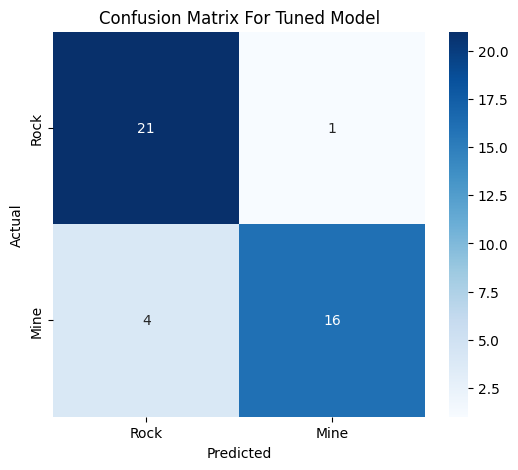

In [29]:
#Visulize Confusion Matrix
cm=confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Rock', 'Mine'], yticklabels=['Rock', 'Mine'])
plt.title('Confusion Matrix For Tuned Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()